In [80]:
import pandas as pd
from itertools import permutations
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from apyori import apriori

In [84]:
#df=pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Market-Basket-Analysis/master/Data/store_data.csv",sep="\n",names=['Transaction'])
#print(df)
#df.to_csv('marketbasket.csv')
groceries=pd.read_csv('marketbasket.csv')

In [85]:
transactions = groceries['Transaction'].apply(lambda t: t.split(','))
transactions = list(transactions)
flattened = [i.strip() for t in transactions for i in t]
print(flattened)
groceries2 = list(set(flattened))

# Generate all possible rules from groceries list
rules = list(permutations(groceries2, 2))

# Print the set of rules
#print(rules)

# Print the number of rules
print(len(rules))


['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil', 'burgers', 'meatballs', 'eggs', 'chutney', 'turkey', 'avocado', 'mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'low fat yogurt', 'whole wheat pasta', 'french fries', 'soup', 'light cream', 'shallot', 'frozen vegetables', 'spaghetti', 'green tea', 'french fries', 'eggs', 'pet food', 'cookies', 'turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil', 'spaghetti', 'champagne', 'cookies', 'mineral water', 'salmon', 'mineral water', 'shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt', 'turkey', 'eggs', 'turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate', 'meatballs', 'milk', 

In [86]:
# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Print the one-hot encoded transaction dataset
print(onehot)


       asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0          False     True               True      False     True        False   
1          False    False              False      False    False        False   
2          False    False              False      False    False        False   
3          False    False              False      False     True        False   
4          False    False              False      False    False        False   
...          ...      ...                ...        ...      ...          ...   
7496       False    False              False      False    False        False   
7497       False    False              False      False    False        False   
7498       False    False              False      False    False        False   
7499       False    False              False      False    False        False   
7500       False    False              False      False    False        False   

      bacon  barbecue sauce

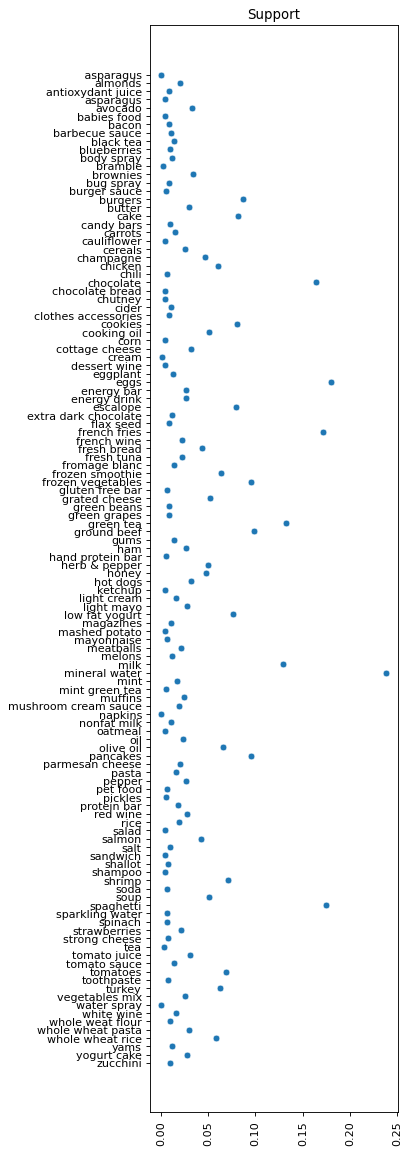

In [87]:
# Compute the support
support = onehot.mean()

# Print the support values
#print(support)
support_df=pd.Series(support)
#print(support_df.values)


#x=support_df.index
#x=np.linspace(-50,50,len(support_df))
#y=support_df.values.astype('float')*1000

#heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
#extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#plt.clf()
#plt.imshow(heatmap.T, extent=extent, origin='lower')
#plt.show()

plt.figure(figsize=(4, 18), dpi=80)
sns.scatterplot(x=support_df.values,y=support_df.index)
plt.xticks(rotation=90)
plt.title("Support")
plt.show()

In [116]:
association_rules=apriori(transactions,min_support=0.001, min_confidence=0.7, min_lift=1.2, min_length=2)
association_results=list(association_rules)

In [117]:
print(len(association_results))

182


In [131]:
print("Confidence tells the probability we will purchase y given we have purchased x\n\n")
print("A lift >1 tell us they occur more often than we expect than based on their support values.  This means this relationship is unlikely by random chance\n\n")
#print(association_results)
for record in association_results:
    #print(record)
    #print(record.items,record.support,record.ordered_statistics)
    print("{foods} support {support} confidence {confidence} lift {lift}".format(
        
       foods=[i for i in record.items],support=round(record.support,3),
        confidence=round(record.ordered_statistics[0].confidence,2),lift=round(record.ordered_statistics[0].lift,2)))

Confidence tells the probability we will purchase y given we have purchased x


A lift >1 tell us they occur more often than we expect than based on their support values.  This means this relationship is unlikely by random chance


['spaghetti', 'pancakes', 'bacon'] support 0.002 confidence 0.81 lift 4.67
['barbecue sauce', 'mineral water', 'chocolate'] support 0.001 confidence 0.77 lift 3.23
['eggs', 'turkey', 'black tea'] support 0.001 confidence 0.73 lift 4.08
['frozen smoothie', 'black tea', 'milk'] support 0.001 confidence 0.82 lift 6.31
['salmon', 'mineral water', 'black tea'] support 0.001 confidence 0.8 lift 3.36
['eggs', 'mineral water', 'blueberries'] support 0.002 confidence 0.75 lift 3.15
['mineral water', 'pancakes', 'blueberries'] support 0.001 confidence 0.73 lift 3.05
['rice', 'mineral water', 'burgers'] support 0.001 confidence 0.73 lift 3.05
['cake', 'white wine', 'spaghetti'] support 0.001 confidence 0.73 lift 4.18
['champagne', 'mineral water', 'soup'] support 0.001